In [1]:
import sys
sys.path.append("../")

from smc.sampler import SMCsampler
from smc.prior import CatalogPrior
from smc.images import ImageAttributes

import torch
# torch.cuda.is_available()
device = torch.device("cuda:5" if torch.cuda.is_available() else "cpu")
torch.cuda.set_device(device)
torch.set_default_device(device)

In [2]:
num_images = 1
img_dim = 15 # Needs to be square for now
img_width = img_dim
img_height = img_dim
max_objects = 10
psf_stdev = 3.25
background_intensity = 19200

image_attributes = ImageAttributes(img_width = img_width,
                                   img_height = img_height,
                                   max_objects = max_objects,
                                   psf_stdev = psf_stdev,
                                   background_intensity = background_intensity)

true_counts, true_fluxes, true_locs, true_total_intensities, images = image_attributes.generate(num_images)

In [3]:
for i in range(num_images):
    print(f"image {i+1}",
          "\ncount\n", true_counts[i].round().item(),
          "\ntotal flux\n", true_fluxes[i].sum().item(),
          "\nloc\n", true_locs[i].cpu().numpy(), "\n\n")

image 1 
count
 8 
total flux
 541982.375 
loc
 [[ 0.          0.        ]
 [ 5.65157    11.281107  ]
 [ 8.566372    6.0580235 ]
 [ 8.662057   10.691967  ]
 [ 4.4409084   0.17668803]
 [ 4.3098755   2.436254  ]
 [ 8.336398    7.22295   ]
 [11.272838   12.705546  ]
 [ 7.20507     9.3013525 ]
 [ 0.          0.        ]
 [ 0.          0.        ]] 




True count: 8
True total flux: 541982.375

Starting the sampler...
iteration 5, temperature = 0.001348261721432209, posterior mean count = 8.662282943725586
iteration 10, temperature = 0.004005937837064266, posterior mean count = 8.489739418029785
iteration 15, temperature = 0.007390883285552263, posterior mean count = 8.382780075073242
iteration 20, temperature = 0.011570286937057972, posterior mean count = 8.305234909057617
iteration 25, temperature = 0.0166524276137352, posterior mean count = 8.26384162902832
iteration 30, temperature = 0.023504016920924187, posterior mean count = 8.240248680114746
iteration 35, temperature = 0.032716959714889526, posterior mean count = 8.216817855834961
iteration 40, temperature = 0.04521472379565239, posterior mean count = 8.186802864074707
iteration 45, temperature = 0.06138566881418228, posterior mean count = 8.16254997253418
iteration 50, temperature = 0.0845004990696907, posterior mean count = 8.150649070739746
iteration 55, temperature = 0.11

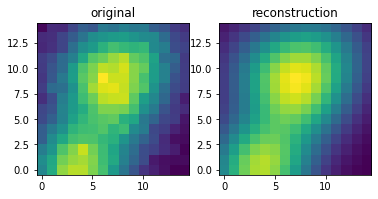

In [4]:
max_objects_smc = max_objects + 2
prior = CatalogPrior(max_objects_smc, img_width, img_height, background_intensity/3.)
smc = SMCsampler(images[0], image_attributes, prior, num_blocks = max_objects_smc+1, catalogs_per_block = 500, max_smc_iters = 1000)

print(f"True count: {true_counts[0]}")
print(f"True total flux: {true_fluxes[0].sum()}\n")

smc.run(print_progress = True)
smc.summarize()